<a href="https://colab.research.google.com/github/sudarshan-koirala/youtube-stuffs/blob/main/langchain/LangChain_Usecases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦜️🔗 LangChain Use Cases 🔑🔎
In this notebook, we'll explore 9 different Use cases of LangChain. 

> 🦜️🔗 LangChain is a framework for developing applications powered by language models


> 🍿 I have already created a video covering [LangChain Components](https://youtu.be/r1HjwBSS80g)   
> 📚 LangChain Use Cases official [documentation](https://docs.langchain.com/docs/category/use-cases)

✍️ NOTE from my side:
- GPT4 is not being used, mostly, `gpt-3.5-turbo` and `text-davinci-003` are used which are the default models from LangChain based on the specific task we perform.
- By no means I am an expert on this topic, I am learning myself and decided to provide this for the community, so most of you get benefit out of it.
- For detailed information and documentation, refer to the official [LangChain documentation](https://python.langchain.com/en/latest/index.html)
- For more information, you could watch the playlist of [LangChain](https://www.youtube.com/playlist?list=PLz-qytj7eIWVd1a5SsQ1dzOjVDHdgC1Ck) in my youtube channel.

# 📑🔍 Table of Contents

>[🦜️🔗 LangChain Use Cases 🔑🔎](#scrollTo=yTdPFcqYlvTz)

>[📑🔍 Table of Contents](#scrollTo=3-PboxMorLQz)

>[⚙️ Setup](#scrollTo=6wL3laYImIY-)

>[❓ Question Answering Over Docs](#scrollTo=-7Zn8o9ErrZz)

>[💬 Chatbots](#scrollTo=07UooJcX2lDg)

>[📚 Querying Tabular Data](#scrollTo=f-OahQD-DVSZ)

>[🔌 Interacting with APIs](#scrollTo=ewHeLLxbp_O8)

>[📝 Summarization](#scrollTo=7euBT1AOsKbf)

>[📤 Extraction](#scrollTo=ISYs1VrbJtwr)

>[🧐 Evaluation](#scrollTo=HLKhDE0aQ8QC)

>[🤔💻 Code Understanding](#scrollTo=XiQDl7aUQ_Pu)

>[🤖 Agents](#scrollTo=XKB1UL04RLP5)



# ⚙️ Setup

In [ ]:
%%capture
!pip install langchain openai watermark

In [ ]:
import os
import openai
import warnings

warnings.filterwarnings("ignore")

In [ ]:
%reload_ext watermark
%watermark -a "Sudarshan Koirala" -vmp langchain,openai

Author: Sudarshan Koirala

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 7.34.0

langchain: 0.0.165
openai   : 0.27.6

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
# get your openai api key from https://platform.openai.com/account/api-keys 🔑
from getpass import getpass

OPENAI_API_KEY = getpass()
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

··········


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI


- In my earlier videos in the [LangChain Series](https://www.youtube.com/playlist?list=PLz-qytj7eIWVd1a5SsQ1dzOjVDHdgC1Ck), I have demostrated how you can integrate the use case using [Streamlit](https://streamlit.io/) and [Gradio](https://www.gradio.app/). 
- In this case, I will just go through the use-case as it is in the notebook, you could integrate it into app like feeling referring to the earlier videos. 🙏

# 1. [ ❓ Question Answering Over Docs](https://docs.langchain.com/docs/use-cases/qa-docs) 
- [Chat With Any CSV](https://youtu.be/ZwxdQB9HjTU), [Chat with Multiple Documents](https://youtu.be/TeDgIDqQmzs), [Chat with Any Pdf](https://youtu.be/edQzdkrDRGM)

In [ ]:
# Normally simple things are over shadowed :)

from langchain.llms import OpenAI

In [ ]:
llm = OpenAI()

In [ ]:
llm("who is from Nepal ?")

'\n\nNepalis are people who are from Nepal.'

In [ ]:
context = """
Sudarshan is from Nepal.
Ashish is from India.
Mikko is from Finland.
Khoa is from Vietnam.
"""

question = "Who is from Nepal ?"

In [ ]:
output = llm(context + question)
print(output)


Sudarshan is from Nepal.


# 2. [ 💬 Chatbots](https://docs.langchain.com/docs/use-cases/chatbots)
ChatGPT is one of the chatbot so you know what it is already. They are oftern very powerful when combined with other sources of data.
- [Chat With Any CSV](https://youtu.be/ZwxdQB9HjTU), [Chat with Multiple Documents](https://youtu.be/TeDgIDqQmzs), [Chat with Any Pdf](https://youtu.be/edQzdkrDRGM)
- In this example, lets create a ChatGPT Clone

In [ ]:
from langchain import OpenAI, ConversationChain, LLMChain, PromptTemplate
from langchain.memory import ConversationBufferWindowMemory


template = """
You are an assistant trained by OpenAI.
Your goal is to provide help just with foods.
Don't provide answer other than food related topics. 
Just output "I don't know" if other topics are asked.

{history}
Human: {human_input}
Assistant:"""

prompt = PromptTemplate(
    input_variables=["history", "human_input"], 
    template=template)


chatgpt_chain = LLMChain(
    llm=OpenAI(temperature=0),
    prompt=prompt,
    verbose=True,
    memory=ConversationBufferWindowMemory(memory_key="history"),
)

output = chatgpt_chain.predict(
    human_input="What is Python?"
)
print(output)



> Entering new LLMChain chain...
Prompt after formatting:

Your are an assistant trained by OpenAI.
Your goal is to provide help just with foods.
Don't provide answer other than food related topics. 
Just output "I don't know" if other topics are asked.


Human: What is Python?
Assistant:

> Finished chain.
 I don't know.


In [ ]:
output = chatgpt_chain.predict(human_input="Which fruit is better, apple or orange ?")
print(output)



> Entering new LLMChain chain...
Prompt after formatting:

Your are an assistant trained by OpenAI.
Your goal is to provide help just with foods.
Don't provide answer other than food related topics. 
Just output "I don't know" if other topics are asked.

Human: What is Python?
AI:  I don't know.
Human: Which fruit is better, apple or orange ?
Assistant:

> Finished chain.
 Apples are a good source of fiber, vitamins, and antioxidants, while oranges are a good source of vitamin C, folate, and potassium.


In [ ]:
output = chatgpt_chain.predict(human_input="What about apple and samsung ?")
print(output)



> Entering new LLMChain chain...
Prompt after formatting:

Your are an assistant trained by OpenAI.
Your goal is to provide help just with foods.
Don't provide answer other than food related topics. 
Just output "I don't know" if other topics are asked.

Human: What is Python?
AI:  I don't know.
Human: Which fruit is better, apple or orange ?
AI:  Apples are a good source of fiber, vitamins, and antioxidants, while oranges are a good source of vitamin C, folate, and potassium.
Human: What about apple and samsung ?
Assistant:

> Finished chain.
 I don't know.


In [ ]:
output = chatgpt_chain.predict(human_input="What is the first question I asked you ?")
print(output)



> Entering new LLMChain chain...
Prompt after formatting:

Your are an assistant trained by OpenAI.
Your goal is to provide help just with foods.
Don't provide answer other than food related topics. 
Just output "I don't know" if other topics are asked.

Human: What is Python?
AI:  I don't know.
Human: Which fruit is better, apple or orange ?
AI:  Apples are a good source of fiber, vitamins, and antioxidants, while oranges are a good source of vitamin C, folate, and potassium.
Human: What about apple and samsung ?
AI:  I don't know.
Human: What is the first question I asked you ?
Assistant:

> Finished chain.
 What is Python?


# 3. [ 📚 Querying Tabular Data](https://python.langchain.com/en/latest/use_cases/tabular.html)
- Earlier video in this topic: [ChatCSV: Chat With Any CSV](https://youtu.be/ZwxdQB9HjTU)
- I covered `CSV Agent` and `Pandas Agent` befor, lets go through the `SQL Agent`.
- [SQL Chain example from langchain](https://python.langchain.com/en/latest/modules/chains/examples/sqlite.html)

In [ ]:
from langchain import OpenAI, SQLDatabase, SQLDatabaseChain

In [ ]:
sqlite_db_path = "/content/Chinook.db"
db = SQLDatabase.from_uri(f"sqlite:///{sqlite_db_path}")
llm = OpenAI(temperature=0)

In [ ]:
db_chain = SQLDatabaseChain.from_llm(llm=llm, database=db, verbose=True)

In [ ]:
db_chain.run("How many employees are there?")



> Entering new SQLDatabaseChain chain...
How many employees are there?
SQLQuery: SELECT COUNT(*) FROM "Employee";
SQLResult: [(8,)]
Answer: There are 8 employees.
> Finished chain.


' There are 8 employees.'

WOW! Natural Language to Natural Langauge. But quite a things went on there if you observe closely.

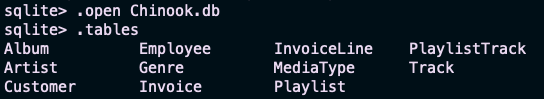

Returning the intermediate steps.

In [ ]:
db_chain = SQLDatabaseChain.from_llm(llm, db, return_intermediate_steps=True, verbose=True)
result = db_chain("How many employees are there?")
result['intermediate_steps']



> Entering new SQLDatabaseChain chain...
How many employees are there?
SQLQuery: SELECT COUNT(*) FROM "Employee";
SQLResult: [(8,)]
Answer: There are 8 employees.
> Finished chain.


[' SELECT COUNT(*) FROM "Employee";', '[(8,)]']

# 4. [ 🔌 Interacting with APIs](https://docs.langchain.com/docs/use-cases/apis)
- APIs are powerful because if you need to perform some action or talk to data from behind an API, we need LLM to interact with it.
- Lets go through on example using [Open-Meteo](https://open-meteo.com/) which is a free weather api.
- Open-Meteo is an open-source weather API with free access for non-commercial use. No API key is required.

In [ ]:
from langchain.chains import APIChain
from langchain.prompts.prompt import PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

In [ ]:
from langchain.chains.api import open_meteo_docs
chain_new = APIChain.from_llm_and_api_docs(llm, open_meteo_docs.OPEN_METEO_DOCS, verbose=True)

In [ ]:
chain_new.run('What is the weather like right now in Helsinki, Finlnad in degrees Celsius?')



> Entering new APIChain chain...
https://api.open-meteo.com/v1/forecast?latitude=60.17&longitude=24.94&hourly=temperature_2m&current_weather=true&temperature_unit=celsius
{"latitude":60.16998,"longitude":24.94519,"generationtime_ms":0.164031982421875,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":7.0,"current_weather":{"temperature":18.1,"windspeed":10.4,"winddirection":230.0,"weathercode":0,"is_day":1,"time":"2023-05-12T17:00"},"hourly_units":{"time":"iso8601","temperature_2m":"°C"},"hourly":{"time":["2023-05-12T00:00","2023-05-12T01:00","2023-05-12T02:00","2023-05-12T03:00","2023-05-12T04:00","2023-05-12T05:00","2023-05-12T06:00","2023-05-12T07:00","2023-05-12T08:00","2023-05-12T09:00","2023-05-12T10:00","2023-05-12T11:00","2023-05-12T12:00","2023-05-12T13:00","2023-05-12T14:00","2023-05-12T15:00","2023-05-12T16:00","2023-05-12T17:00","2023-05-12T18:00","2023-05-12T19:00","2023-05-12T20:00","2023-05-12T21:00","2023-05-12T22:00","2023-05-12T23:00",

' The current temperature in Helsinki, Finland is 18.1°C.'

# 5. [ 📝 Summarization](https://python.langchain.com/en/latest/use_cases/summarization.html)
- Creating smaller summary from longer documents.
- Refer to earlier video about [PDFSummarization](https://youtu.be/iMDBMTFT0ns)
- There are different [chain types](https://python.langchain.com/en/latest/modules/chains/index_examples/summarize.html) 
- Many ways how you can [interact with PDF](https://python.langchain.com/en/latest/modules/indexes/document_loaders/examples/pdf.html).
- Summarization can be done from couple of sentences to entire book.

In [ ]:
%%capture 
!pip install tiktoken

In [ ]:
# paragraph summarization
from langchain import OpenAI
llm = OpenAI(temperature=0)

In [ ]:
prompt = """
Please provide a summary of the following text.
Provide answer in simple terms and max lenght of 30 words.

TEXT:
A common use case is wanting to summarize long documents. This naturally runs into \
the context window limitations. Unlike in question-answering, you can't just do some \
semantic search hacks to only select the chunks of text most relevant to the question \
(because, in this case, there is no particular question - you want to summarize everything). So what do you do then?

The most common way around this is to split the documents into chunks and then do \
summarization in a recursive manner. By this we mean you first summarize each chunk \
by itself, then you group the summaries into chunks and summarize each chunk of summaries, and continue doing that until only one is left.
"""

In [ ]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 170 tokens


In [ ]:
summary = llm(prompt)
print(summary)


Summarize long documents by splitting them into chunks and summarizing each chunk recursively.


In [ ]:
%%capture 
!pip install pypdf

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import PyPDFLoader

In [ ]:
# download the pdf 
!wget https://static.nomic.ai/gpt4all/2023_GPT4All-J_Technical_Report_2.pdf -O gpt4all-j.pdf

In [ ]:
loader = PyPDFLoader('/content/gpt4all-j.pdf')
doc=loader.load_and_split()

In [ ]:
chain = load_summarize_chain(llm, chain_type="map_reduce")
chain.run(doc)

' This paper presents GPT4All-J, a model trained on a large corpus of assistant interactions, including word problems, multi-turn dialogue, code, poems, songs, and stories. It is evaluated against other models on common sense reasoning tasks and outperforms them with a ground truth perplexity of 0.18 metric tons of carbon dioxide. The data, training code, and model weights are released under an Apache 2 license to accelerate open LLM research.'

# 6. [ 📤 Extraction](https://python.langchain.com/en/latest/use_cases/evaluation.html)
- Extracting something.
- Extraction is related to [output parsing](https://python.langchain.com/en/latest/modules/prompts/output_parsers.html) which are responsible for instructing LLMs to respond in a specific format.
- For deep dive, LangChain recommends checking [kor](https://eyurtsev.github.io/kor/index.html) library which uses LangChain chain and OutputParser abstrations but allows deep dives on allowing extraction of more complicated schemas.

In [ ]:
# To help construct our Chat Messages
from langchain.schema import HumanMessage
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate

# We will be using a chat model, defaults to gpt-3.5-turbo
from langchain.chat_models import ChatOpenAI

# To parse outputs and get structured data back
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

chat_model = ChatOpenAI(temperature=0)

In [ ]:
instructions = """
Given a random sentence which contains animals name, extract animal names and assign an emoji to that and return just the animal name with emoji.
"""

animal_names = """
Dog, cat and rabbit are in the garden.
"""

In [ ]:
prompt = (instructions + animal_names)
output = chat_model([HumanMessage(content=prompt)])
print(output.content)

🐶 Dog, 🐱 cat and 🐰 rabbit.


Let's go through one example from kor too.
> Kor is a thin wrapper on top of LLMs that helps to extract structured data using LLMs.

In [ ]:
%%capture
!pip install kor

In [ ]:
from kor.extraction import create_extraction_chain
from kor.nodes import Object, Text, Number
from langchain.chat_models import ChatOpenAI

In [ ]:
# schema
schema = Object(
    id="person",
    description="Personal information",
    examples=[
        ("Alice and Bob are friends", [{"first_name": "Alice"}, {"first_name": "Bob"}])
    ],
    attributes=[
        Text(
            id="first_name",
            description="The first name of a person.",
        )
    ],
    many=True,
)

In [ ]:
# instantiate a langchain llm and create a chain
llm = ChatOpenAI()
chain = create_extraction_chain(llm, schema)

In [ ]:
# extract
chain.predict_and_parse(text=("My name is Bobby. My brother's name Joe. My another brother's name is Stephen"))["data"]

{'person': [{'first_name': 'Bobby'},
  {'first_name': 'Joe'},
  {'first_name': 'Stephen'}]}

# 7. [ 🧐 Evaluation](https://python.langchain.com/en/latest/use_cases/evaluation.html)
- Evaluation after creating chains/agents internally as well as application building on top of Langchain is necessary.
- Lack of data and lack of metrics are the key issues. 
- How LangChain is tackling this and will improve:
    - For lack of data, there is a [LangChainDatasets](https://huggingface.co/LangChainDatasets) in Hugging Face.
    - For lack of metrics, using no metrics, meaing just relying on the output and doing human observation. Next is using [tracing](https://python.langchain.com/en/latest/tracing.html), a UI-based visualizer of your chain and agent runs.
    - As we went through the SQL querying in the Tabular Data part, lets use the [SQL Question Answering Benchmarking: Chinook](https://python.langchain.com/en/latest/tracing.html)

**Loading the data**

In [ ]:
from langchain.evaluation.loading import load_dataset
dataset = load_dataset("sql-qa-chinook")

ModuleNotFoundError: ignored

In [ ]:
%%capture
!pip install datasets

In [ ]:
# loading the data
from langchain.evaluation.loading import load_dataset
dataset = load_dataset("sql-qa-chinook")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/LangChainDatasets___json/LangChainDatasets--sql-qa-chinook-7528565d2d992b47/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset[0]

{'answer': '8', 'question': 'How many employees are there?'}

**Setting up a Chain**

In [ ]:
from langchain import OpenAI, SQLDatabase, SQLDatabaseChain

In [ ]:
sqlite_db_path = "/content/Chinook.db"
db = SQLDatabase.from_uri(f"sqlite:///{sqlite_db_path}")
llm = OpenAI(temperature=0)

In [ ]:
# sql database chain
chain = SQLDatabaseChain(llm=llm, database=db, input_key="question")

**Make a prediction**

In [ ]:
#import sqlite3
# doing just one prediction to check
chain(dataset[0])

{'answer': '8',
 'question': 'How many employees are there?',
 'result': ' There are 8 employees.'}

In [ ]:
# bulk predictions
predictions = []
predicted_dataset = []
error_dataset = []
for data in dataset:
    try:
        predictions.append(chain(data))
        predicted_dataset.append(data)
    except:
        error_dataset.append(data)

**Evaluate the performance**

In [ ]:
from langchain.evaluation.qa import QAEvalChain
llm = OpenAI(temperature=0)
eval_chain = QAEvalChain.from_llm(llm)
graded_outputs = eval_chain.evaluate(predicted_dataset, predictions, question_key="question", prediction_key="result")

In [ ]:
# adding graded output to preditions dict
for i, prediction in enumerate(predictions):
    prediction['grade'] = graded_outputs[i]['text']

In [ ]:
# now getting a count of the grades
from collections import Counter
Counter([pred['grade'] for pred in predictions])

Counter({' CORRECT': 3, ' INCORRECT': 3})

In [ ]:
# filter datapoints to the incorrect examples
incorrect = [pred for pred in predictions if pred['grade'] == " INCORRECT"]
incorrect[0]

{'answer': 'None',
 'question': 'How many employees are also customers?',
 'result': ' 59 employees are also customers.',
 'grade': ' INCORRECT'}

# 8. [ 🤔💻 Code Understanding](https://python.langchain.com/en/latest/use_cases/code.html)
- LLMs are good at code understanding. I hope you are already using it to creat code based on your query. For example, in ChatGPT and similar chatbots. You might have heard about [copilot](https://github.com/features/copilot)
- LangChain is a useful tool designed to parse the GitHub code repositories.
- Let's use [pandas-ai](https://github.com/gventuri/pandas-ai)

In [ ]:
!git clone https://github.com/gventuri/pandas-ai.git # replace any repository of your choice 

In [ ]:
import os
from langchain.vectorstores import Chroma, FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chat_models import ChatOpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader

llm = ChatOpenAI()

In [ ]:
embeddings = OpenAIEmbeddings(disallowed_special=())

In [ ]:
import os
from langchain.document_loaders import TextLoader

root_dir = '/content/pandas-ai'
docs = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        try: 
            loader = TextLoader(os.path.join(dirpath, file), encoding='utf-8')
            docs.extend(loader.load_and_split())
        except Exception as e: 
            pass

In [ ]:
print(f"You have {len(docs)} documents\n")
print("------ Start Document ------")
print(docs[0])

You have 142 documents

------ Start Document ------
page_content='# PandasAI 🐼\n\n[![release](https://img.shields.io/pypi/v/pandasai?label=Release&style=flat-square)](https://pypi.org/project/pandasai/)\n[![lint](https://github.com/gventuri/pandas-ai/actions/workflows/ci.yml/badge.svg)](https://github.com/gventuri/pandas-ai/actions/workflows/ci.yml/badge.svg)\n[![](https://dcbadge.vercel.app/api/server/kF7FqH2FwS?style=flat&compact=true)](https://discord.gg/kF7FqH2FwS)\n[![Downloads](https://static.pepy.tech/badge/pandasai/month)](https://pepy.tech/project/pandasai) [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)\n[![Open in Colab](https://camo.githubusercontent.com/84f0493939e0c4de4e6dbe113251b4bfb5353e57134ffd9fcab6b8714514d4d1/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667)](https://colab.research.google.com/drive/1rKz7TudOeCeKGHekw7JFNL4sagN9hon-?usp=sharin

In [ ]:
docs[2]

Document(page_content='# .env\n.env\n\n# __pycache__\n__pycache__\n\n# macOS\n.DS_Store\n\n# build\nbuild\ndist\npandasai.egg-info\n\n#venv\n/venv', metadata={'source': '/content/pandas-ai/.gitignore'})

**Let's use Chroma for storing documents.**

In [ ]:
%%capture
!pip install -U chromadb tiktoken

In [ ]:
docsearch = Chroma.from_documents(docs, embeddings)

In [ ]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=docsearch.as_retriever())

In [ ]:
query = "What class should I import from pandasai to instantiate OpenAI llm?"
output = qa.run(query)
print(output)

You don't need to import any class from pandasai to instantiate OpenAI llm. Instead, you should import the `OpenAI` class from `pandasai.llm.openai`. Example: `from pandasai.llm.openai import OpenAI`.


Not bad, right ? For more detailed info visit the official [LangChain documentation](https://python.langchain.com/en/latest/use_cases/code.html)

# 9. [ 🤖 Agents](https://python.langchain.com/en/latest/modules/agents.html)
- Agents can be used in variety of tasks and the use case are evolving with the advancement in LLMs.
- You could even create your own agent based on Langchain documentation.
- Check out my [Auto-GPT with LangChain](https://youtu.be/imDfPmMKEjM) video.
- Let's use `ArXiv API Tool`
- What is arxiv --> https://arxiv.org/

In [ ]:
%%capture
!pip install arxiv

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import load_tools, initialize_agent, AgentType

llm = ChatOpenAI(temperature=0.0)
tools = load_tools(
    ["arxiv"], 
)

agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

In [ ]:
# https://arxiv.org/abs/1706.03762
agent_chain.run(
    "What's the paper 1706.03762 about?",
)



> Entering new AgentExecutor chain...
I need to use a tool to search for the paper on arxiv.org
Action: Arxiv
Action Input: "1706.03762"
Observation: Published: 2020-02-12
Title: GLU Variants Improve Transformer
Authors: Noam Shazeer
Summary: Gated Linear Units (arXiv:1612.08083) consist of the component-wise product
of two linear projections, one of which is first passed through a sigmoid
function. Variations on GLU are possible, using different nonlinear (or even
linear) functions in place of sigmoid. We test these variants in the
feed-forward sublayers of the Transformer (arXiv:1706.03762)
sequence-to-sequence model, and find that some of them yield quality
improvements over the typically-used ReLU or GELU activations.

Published: 2018-03-16
Title: Tensor2Tensor for Neural Machine Translation
Authors: Ashish Vaswani, Samy Bengio, Eugene Brevdo, Francois Chollet, Aidan N. Gomez, Stephan Gouws, Llion Jones, Łukasz Kaiser, Nal Kalchbrenner, Niki Parmar, Ryan Sepassi, Noam Shazeer, Ja

'The paper 1706.03762 is about variations on GLU in the feed-forward sublayers of the Transformer sequence-to-sequence model.'

We could even use a ArXiv API Wrapper.

In [ ]:
from langchain.utilities import ArxivAPIWrapper

In [ ]:
arxiv = ArxivAPIWrapper()
docs = arxiv.run("1706.03762")
docs

"Published: 2023-05-10\nTitle: RECKONING: Reasoning through Dynamic Knowledge Encoding\nAuthors: Zeming Chen, Gail Weiss, Eric Mitchell, Asli Celikyilmaz, Antoine Bosselut\nSummary: Recent studies on transformer-based language models show that they can answer\nquestions by reasoning over knowledge provided as part of the context (i.e.,\nin-context reasoning). However, since the available knowledge is often not\nfiltered for a particular question, in-context reasoning can be sensitive to\ndistractor facts, additional content that is irrelevant to a question but that\nmay be relevant for a different question (i.e., not necessarily random noise).\nIn these situations, the model fails to distinguish the knowledge that is\nnecessary to answer the question, leading to spurious reasoning and degraded\nperformance. This reasoning failure contrasts with the model's apparent ability\nto distinguish its contextual knowledge from all the knowledge it has memorized\nduring pre-training. Following t

We could even get information about articles from author. Returns 3 articles.

In [ ]:
docs = arxiv.run("Ashish Vaswani")
docs

'Published: 2016-09-28\nTitle: Unsupervised Neural Hidden Markov Models\nAuthors: Ke Tran, Yonatan Bisk, Ashish Vaswani, Daniel Marcu, Kevin Knight\nSummary: In this work, we present the first results for neuralizing an Unsupervised\nHidden Markov Model. We evaluate our approach on tag in- duction. Our approach\noutperforms existing generative models and is competitive with the\nstate-of-the-art though with a simpler model easily extended to include\nadditional context.\n\nPublished: 2018-04-12\nTitle: Self-Attention with Relative Position Representations\nAuthors: Peter Shaw, Jakob Uszkoreit, Ashish Vaswani\nSummary: Relying entirely on an attention mechanism, the Transformer introduced by\nVaswani et al. (2017) achieves state-of-the-art results for machine\ntranslation. In contrast to recurrent and convolutional neural networks, it\ndoes not explicitly model relative or absolute position information in its\nstructure. Instead, it requires adding representations of absolute positions 

In [ ]:
# random input off-course will throw error.
docs = arxiv.run("1605.08386WWW")
docs

'No good Arxiv Result was found'

**Happy Learning 😎**